In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import math

In [2]:
train_set_initial = h5py.File("datasets/train_catvnoncat.h5", "r")
test_set_initial = h5py.File("datasets/test_catvnoncat.h5", "r")

In [3]:
train_set_x = np.array(train_set_initial["train_set_x"]).reshape(np.array(train_set_initial["train_set_x"]).shape[0], -1).T / 255

In [4]:
train_set_y = np.array(train_set_initial["train_set_y"]).reshape(1, np.array(train_set_initial["train_set_y"]).shape[0])

In [5]:
test_set_x = np.array(test_set_initial["test_set_x"]).reshape(np.array(test_set_initial["test_set_x"]).shape[0], -1).T / 255

In [6]:
test_set_y = np.array(test_set_initial["test_set_y"]).reshape(1, np.array(test_set_initial["test_set_y"].shape[0]))

In [7]:
def sigmoid(z):
    return (1/(1 + np.exp(-z)))

In [8]:
def initialize_with_zeros(dimension):
    w = np.zeros(shape=(dimension, 1))
    b = 0
    return w, b

In [9]:
def propagate(w, b, x, Y_real):
    m = x.shape[1]
    
    #Forward propogation
    Y_predict = sigmoid(np.dot(w.T, x) + b)
    cost = (-1 / m)*( np.sum((Y_real*np.log(Y_predict)) + (1 - Y_real)*np.log(1 - Y_predict)) )
    
    #Backward propogation
    dz = (Y_predict - Y_real)

    dw = (1 / m)*np.dot(x, dz.T)
    db = (1 / m)*np.sum(dz)
    
    grads = {
        "dw" : dw,
        "db" : db
    }
    
    return grads, cost

In [10]:
def optimize(w, b, x, y, n_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(n_iterations):
        grads, cost = propagate(w, b, x, y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if(i!=100):
            costs.append(cost)
            
            if(print_cost):
                print("Cost after iteration ", i, " is ", cost)
    params = {
        "w" : w,
        "b" : b
    }
    
    grads = {
        "dw" : dw,
        "db" : db
    }
    
    return params, grads, costs

In [11]:
def predict(w, b, x):
    
    m = x.shape[1]
    Y_prediction = np.zeros(shape=(1, m))
    w = w.reshape(x.shape[0], 1)
    a = sigmoid(np.dot(w.T, x) + b)
    
    print(w)
    print(b)
    
    for i in range(a.shape[1]):    
        Y_prediction[0, i] = 1 if a[0, i] > 0.5 else 0
    
    return Y_prediction

In [12]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate=0.5, print_cost=False):
        
    w, b = initialize_with_zeros(X_train.shape[0])

    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    

    w = parameters["w"]
    b = parameters["b"]
    
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [13]:
def show(i, d):
    plt.imshow(np.array(test_set_initial["test_set_x"])[i])
    if d["Y_prediction_test"][0][i] == 1.0:
        print("This is a cat")
    else:
        print("This is not a cat")
    

In [14]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

[[ 0.00961402]
 [-0.0264683 ]
 [-0.01226513]
 ...
 [-0.01144453]
 [-0.02944783]
 [ 0.02378106]]
-0.015906243999692968
[[ 0.00961402]
 [-0.0264683 ]
 [-0.01226513]
 ...
 [-0.01144453]
 [-0.02944783]
 [ 0.02378106]]
-0.015906243999692968
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


This is a cat


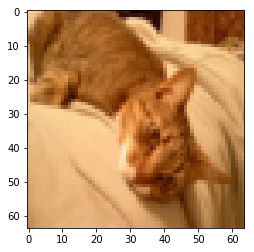

In [15]:
show(26, d)